In [78]:
import pandas as pd
import numpy as np


df = pd.read_csv("./training_dataset.csv", encoding='cp1252')

df.head()

ValueError: Format specifier missing precision

ValueError: Format specifier missing precision

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 32 columns):
OBS_ID                   6662 non-null int64
KANAL                    6662 non-null int64
SHOW_ID                  6662 non-null int64
FAKTOR                   6662 non-null float64
WORDING_ID               6662 non-null int64
BRAND_FLG                6662 non-null int64
BRAND_ID                 6662 non-null float64
WDHL_FLG                 6662 non-null int64
BESTELL_ID               6662 non-null int64
ARTIKEL_ID               6662 non-null int64
SHOW_POSITION            6662 non-null int64
NEW_ITEM_FLG             6662 non-null int64
AIRING_23_FLG            6662 non-null int64
AIRING_456_FLG           6662 non-null int64
ADT_FLG                  6662 non-null int64
WG_ID                    6662 non-null int64
WGH1_ID                  6662 non-null int64
WGH3_ID                  6662 non-null int64
PREIS_DISCOUNT           6662 non-null float64
ANZ_ARTIKEL_ID           6662 no

In [80]:
# calculate correlation between SOLD_OUT_FLG and all other variables

correlations_data = df.corr()['SOLD_OUT_FLG'].sort_values()
print(correlations_data)

ValueError: Format specifier missing precision

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
print(corr)

fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches


sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, linewidths=.5, ax=ax)

ValueError: Format specifier missing precision

In [82]:
x = df

In [83]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        df = x.drop(col, axis=1)

    return df

In [84]:
df = corr_df(df, 0.6)

SHOW_ID | OBS_ID | 0.91
BESTELL_ID | OBS_ID | 0.7
BESTELL_ID | SHOW_ID | 0.8
ARTIKEL_ID | OBS_ID | 0.7
ARTIKEL_ID | SHOW_ID | 0.8
WGH3_ID | WG_ID | 1.0
PREIS_LABEL_DESC | PREIS_DISCOUNT | 0.7


In [85]:
df.drop(["BESTELL_ID","ARTIKEL_ID","WG_ID","WGH1_ID","PREIS_LABEL_DESC"],axis=1,inplace=True)

In [86]:
df.head()

ValueError: Format specifier missing precision

ValueError: Format specifier missing precision

In [87]:
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = df[["PREIS_DISCOUNT","KANAL","FAKTOR","NEW_ITEM_FLG","MENGE_ECOM",
               "MENGE_CALL","ONAIR_SEKUNDEN","WGH3_DESC", "MENGE_FREI_SHOWBEGINN",
              "AIRING_23_FLG","ADT_FLG"]]
targets = df[['SOLD_OUT_FLG']]

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(5329, 11)
(1333, 11)
(5329, 1)
(1333, 1)


In [88]:
# Save the training, and testing data
X.to_csv('./training_features.csv', index = False)
X_test.to_csv('./testing_features.csv', index = False)
y.to_csv('./training_labels.csv', index = False)
y_test.to_csv('./testing_labels.csv', index = False)

In [89]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [90]:
# Read in data into dataframes 
train_features = pd.read_csv('./training_features.csv')
test_features = pd.read_csv('./testing_features.csv')
train_labels = pd.read_csv('./training_labels.csv')
test_labels = pd.read_csv('./testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (5329, 11)
Testing Feature Size:   (1333, 11)
Training Labels Size:   (5329, 1)
Testing Labels Size:    (1333, 1)


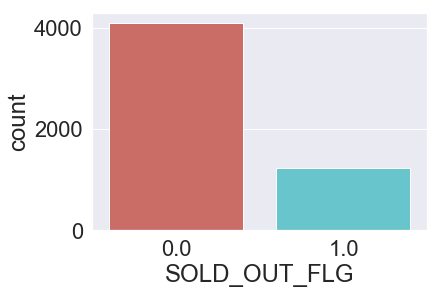

In [91]:
sns.countplot(x="SOLD_OUT_FLG",data=train_labels,palette="hls")
plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [93]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [94]:
testing = pd.read_csv("./test_dataset.csv", encoding='cp1252')

testing.drop(["BESTELL_ID","ARTIKEL_ID","WG_ID","WGH1_ID","PREIS_LABEL_DESC"],axis=1,inplace=True)



In [95]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 27 columns):
OBS_ID                   1003 non-null int64
KANAL                    1003 non-null int64
SHOW_ID                  1003 non-null int64
FAKTOR                   1003 non-null float64
WORDING_ID               1003 non-null int64
BRAND_FLG                1003 non-null int64
BRAND_ID                 1003 non-null float64
WDHL_FLG                 1003 non-null int64
SHOW_POSITION            1003 non-null int64
NEW_ITEM_FLG             1003 non-null int64
AIRING_23_FLG            1003 non-null int64
AIRING_456_FLG           1003 non-null int64
ADT_FLG                  1003 non-null int64
WGH3_ID                  1003 non-null int64
PREIS_DISCOUNT           1003 non-null float64
ANZ_ARTIKEL_ID           1003 non-null int64
ONAIR_SEKUNDEN           1003 non-null int64
MENGE_CALL               1003 non-null float64
MENGE_ECOM               1003 non-null float64
WG_DESC                  100

In [96]:
testing["SOLD_OUT_FLG"] = testing["SOLD_OUT_FLG"].astype('category')

In [97]:
testing.head()

ValueError: Format specifier missing precision

ValueError: Format specifier missing precision

In [98]:
xtest = testing[["PREIS_DISCOUNT","KANAL","FAKTOR","NEW_ITEM_FLG","MENGE_ECOM",
               "MENGE_CALL","ONAIR_SEKUNDEN","WGH3_DESC", "MENGE_FREI_SHOWBEGINN",
              "AIRING_23_FLG","ADT_FLG"]]

In [99]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X, y)

print(LR.score(X_test, y_test))
# print(model.score(X_training, y_training)) 
# shows how many percent of the dataset was predicted correctly

y_pred = LR.predict(X_test)

from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred) 

0.9099774943735934


0.7521468238335445

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


scores = cross_val_score(LogisticRegression(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.90619137 0.91744841 0.90900563 0.92213884 0.92206573 0.92120075
 0.92307692 0.90712946 0.91932458 0.91924883 0.92213884 0.91744841
 0.91651032 0.91651032 0.91455399 0.91838649 0.91463415 0.91744841
 0.92589118 0.91173709 0.90900563 0.92026266 0.93058161 0.9108818
 0.91361502 0.92589118 0.90619137 0.91932458 0.9108818  0.92112676
 0.92682927 0.9249531  0.90900563 0.90619137 0.91549296 0.93058161
 0.89681051 0.91932458 0.92401501 0.90516432 0.9249531  0.90900563
 0.91838649 0.91744841 0.91173709 0.90900563 0.91838649 0.92120075
 0.92307692 0.90892019]
0.9166068229263007


In [101]:
y_predictionLR = LR.predict(xtest)

print(y_predictionLR)


SOLD_OUT_FLG = pd.DataFrame(data=y_predictionLR,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([testing['OBS_ID'],SOLD_OUT_FLG],axis =1)
pred_final.to_csv('sold_out_predict.csv',index=False)

print(sum(y_predictionLR))

[0. 0. 0. ... 0. 0. 0.]
0.0


In [102]:
from sklearn.decomposition import PCA

p = PCA()
p.fit(X)

print(np.sum(p.explained_variance_ratio_[:10]))

0.9806768667626002


In [103]:
from sklearn.decomposition import PCA

p = PCA(n_components=5)

X_transformed = p.fit_transform(X)
X_test_transformed = p.transform(X_test)

clf = LogisticRegression()
clf.fit(X_transformed, y)

print(clf.score(X_test_transformed, y_test))

0.7771942985746436


In [104]:
from sklearn.svm import SVC

svc = SVC(kernel = "poly", degree=3)
svc.fit(X, y)

print(svc.score(X_test, y_test))

y_pred = svc.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.795198799699925


0.2538053667998277

In [105]:
scores = cross_val_score(SVC(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.80956848 0.8358349  0.85834897 0.84427767 0.85070423 0.86866792
 0.82833021 0.83489681 0.83208255 0.83943662 0.85084428 0.85084428
 0.82551595 0.84521576 0.83849765 0.8358349  0.82926829 0.82270169
 0.86022514 0.87042254 0.83395872 0.85084428 0.84990619 0.8358349
 0.85070423 0.84990619 0.83958724 0.83771107 0.84333959 0.84507042
 0.83208255 0.84990619 0.85178236 0.84709193 0.84037559 0.83302064
 0.86491557 0.86022514 0.8358349  0.82253521 0.85459662 0.82457786
 0.85272045 0.84333959 0.82253521 0.83958724 0.84615385 0.83395872
 0.84146341 0.8629108 ]
0.8425599098027817


In [106]:
y_predSVC = svc.predict(xtest)

print(y_predSVC)


SOLD_OUT_FLG = pd.DataFrame(data=y_predSVC,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([testing['OBS_ID'],SOLD_OUT_FLG],axis =1)
pred_final.to_csv('sold_out_predict.csv',index=False)

print(sum(y_predSVC))

[0. 0. 0. ... 0. 0. 0.]
0.0


In [107]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = "entropy", n_estimators = 15)
classifier.fit(X, y)

print(classifier.score(X_test, y_test))

y_pred = classifier.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8807201800450113


0.6503898923336131

In [108]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.87804878 0.87804878 0.86022514 0.87898687 0.88450704 0.88461538
 0.85741088 0.88649156 0.87242026 0.87511737 0.87898687 0.88555347
 0.87429644 0.86397749 0.8685446  0.86491557 0.88273921 0.87523452
 0.85741088 0.87605634 0.87242026 0.87617261 0.87148218 0.88555347
 0.86478873 0.86491557 0.87335835 0.87148218 0.87898687 0.857277
 0.85741088 0.84615385 0.86772983 0.88273921 0.87793427 0.88180113
 0.88273921 0.87335835 0.86210131 0.87793427 0.86772983 0.87711069
 0.87148218 0.8836773  0.87042254 0.86772983 0.87711069 0.85834897
 0.869606   0.8685446 ]
0.872433792246915


In [109]:
y_predClassifier = classifier.predict(xtest)

# y_predClassifier = np.round(classifier.predict(xtest))


print(y_predClassifier)

# shs = y_predClassifier
# np.int_(shs)
# print(shs)
# shs.astype(int)
# print(shs)



SOLD_OUT_FLG = pd.DataFrame(data=y_predClassifier,columns=['SOLD_OUT_FLG'])
pred_final=pd.concat([testing['OBS_ID'],SOLD_OUT_FLG],axis =1)
pd.options.display.float_format = '{:,.f}'.format
pred_final.to_csv('sold_out_predict.csv',index=False)



print(sum(y_predClassifier))

[1. 1. 1. ... 1. 0. 0.]
430.0


In [110]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier()
neighbors.fit(X, y)

print(neighbors.score(X_test, y_test))

y_pred = neighbors.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7944486121530383


0.35834445787351704

In [111]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.80393996 0.80300188 0.79080675 0.78517824 0.75680751 0.77298311
 0.79362101 0.77298311 0.78424015 0.80187793 0.80393996 0.77579737
 0.8011257  0.80863039 0.7971831  0.80487805 0.7804878  0.80300188
 0.80675422 0.78967136 0.79737336 0.79549719 0.79643527 0.78236398
 0.79812207 0.79643527 0.77861163 0.78893058 0.7945591  0.79061033
 0.79549719 0.7879925  0.78330206 0.79831144 0.80657277 0.80769231
 0.77954972 0.80300188 0.7804878  0.80751174 0.81144465 0.7945591
 0.80206379 0.77954972 0.7915493  0.78236398 0.815197   0.78424015
 0.76547842 0.81784038]
0.7930010834236186


In [112]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(n_estimators = 10) 
gbrt.fit(X, y) 
print(gbrt.score(X_test, y_test))

y_pred=gbrt.predict(X_test) 

0.33572492278123633


In [113]:
scores = cross_val_score(GradientBoostingRegressor(), X, y, cv = RepeatedKFold(n_repeats = 10))

print(scores)
print(np.mean(scores))

[0.5844091  0.55654156 0.53787619 0.52838654 0.59294477 0.55067651
 0.53854358 0.56876062 0.56096117 0.59960089 0.56706234 0.55776835
 0.56088056 0.56100011 0.54432005 0.57323778 0.56534082 0.56347623
 0.54372827 0.54768384 0.56620216 0.54785765 0.57709525 0.59338245
 0.54303778 0.56433513 0.54051172 0.61097784 0.5473403  0.55193116
 0.58232339 0.56085994 0.58207929 0.52462476 0.56172184 0.55884526
 0.56039966 0.56004248 0.56740903 0.57553565 0.54418747 0.55424866
 0.5652249  0.57978023 0.57255907 0.55035936 0.59242351 0.57864296
 0.56131245 0.5451788 ]
0.5624725883625077
